In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [5]:
raw_data = pd.read_csv('data.csv')
raw_data.columns=['Benchmark', 'B1', 'B2', 'B3', 'B4', 'A1', 'A2', 'A3', 'A4']
raw_data

Benchmark    B1   B2   B3    B4   A1   A2   A3   A4
0        bs  2273  277   50    72  308  315  310  307
1        km  3064  990  967  1182  219  211  222  217
2       bfs     4    1    1     1    1    1    1    1
3       fir  2200  126   11   256  379  440  437  436
4       flw  2442   95   29     9  527  519  529  524
5        mt  6247  512  640   613  568  582  569  586
6        pr     1    1    1     1    1    1    1    1
7        fw  1437  291  806   544  580  583  580  574
8        st  5963  461  502   190  759  752  763  757
9        sc   396   15    8    10  100  102  102  102

In [6]:
stacked_data = raw_data
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data = stacked_data.sort_values(['Benchmark']).reset_index()
stacked_data['bTotal'] = stacked_data['B1'] + stacked_data['B2'] + stacked_data['B3'] + stacked_data['B4']
stacked_data['B1'] = stacked_data['B1']/stacked_data['bTotal'] * 100
stacked_data['B2'] = stacked_data['B2']/stacked_data['bTotal'] * 100
stacked_data['B3'] = stacked_data['B3']/stacked_data['bTotal'] * 100
stacked_data['B4'] = stacked_data['B4']/stacked_data['bTotal'] * 100

stacked_data['aTotal'] = stacked_data['A1'] + stacked_data['A2'] + stacked_data['A3'] + stacked_data['A4']
stacked_data['A1'] = stacked_data['A1']/stacked_data['aTotal'] * 100
stacked_data['A2'] = stacked_data['A2']/stacked_data['aTotal'] * 100
stacked_data['A3'] = stacked_data['A3']/stacked_data['aTotal'] * 100
stacked_data['A4'] = stacked_data['A4']/stacked_data['aTotal'] * 100

stacked_data

index Benchmark         B1         B2         B3         B4         A1  \
0      2       BFS  57.142857  14.285714  14.285714  14.285714  25.000000   
1      0        BS  85.067365  10.366766   1.871257   2.694611  24.838710   
2      3       FIR  84.843810   4.859236   0.424219   9.872734  22.399527   
3      4       FLW  94.834951   3.689320   1.126214   0.349515  25.107194   
4      7        FW  46.686160   9.454191  26.185835  17.673814  25.032369   
5      1        KM  49.395454  15.960019  15.589231  19.055296  25.201381   
6      5        MT  77.970544   6.390414   7.988018   7.651023  24.642082   
7      6        PR  25.000000  25.000000  25.000000  25.000000  25.000000   
8      9        SC  92.307692   3.496503   1.864802   2.331002  24.630542   
9      8        ST  83.797077   6.478359   7.054525   2.670039  25.041241   

          A2         A3         A4  bTotal  aTotal  
0  25.000000  25.000000  25.000000       7       4  
1  25.403226  25.000000  24.758065    2672    1240  
2  26.004728  25.827423  25.768322    2593    1692  
3  24.726060  25.202477  24.964269    2575    2099  
4  25.161847  25.032369  24.773414    3078    2317  
5  24.280783  25.546605  24.971231    6203     869  
6  25.249458  24.685466  25.422993    8012    2305  
7  25.000000  25.000000  25.000000       4       4  
8  25.123153  25.123153  25.123153     429     406  
9  24.810294  25.173210  24.975256    7116    3031

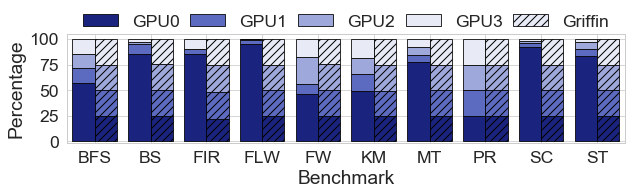

In [29]:
fig, ax = plt.subplots(figsize=(10, 2))

stacked_data.loc[:, ['Benchmark', 'B1', 'B2', 'B3', 'B4']].plot.bar(
    stacked=True, x='Benchmark', position=1,
    color=['#1A237E', '#5C6BC0', '#9FA8DA', '#E8EAF6'], ec='k',
    width=0.4,
    ax=ax)
stacked_data.loc[:, ['Benchmark', 'A1', 'A2', 'A3', 'A4']].plot.bar(
    stacked=True, x='Benchmark', position=0,
    color=['#1A237E', '#5C6BC0', '#9FA8DA', '#E8EAF6'], ec='k', hatch='///',
    width=0.4,
    ax=ax)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:4] + handles[7:8], ['GPU0', 'GPU1', 'GPU2', 'GPU3', 'Griffin'], 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=5)
ax.set_xticklabels(stacked_data['Benchmark'], rotation=0)
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel('Percentage')
ax.set_xlim(-0.5, 9.5)
ax.set_ylim(-1, 105)

plt.savefig('occupancy_improve.pdf', bbox_inches='tight')
plt.show()
plt.close()